# Exploratory Data Analysis

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.It provides the context needed to develop an appropriate model – and interpret the results correctly.

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas_profiling as pp
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud

# Load The Data

In [2]:
datascientist_data = pd.read_csv('raw_data/datascientist_data_cleaned.csv')

In [3]:
datascientist_data.head()

Job Title                                    Job Description  \
0        Data Scientist  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...   
1        Data Scientist  At Noom, we use scientifically proven methods ...   
2  DATA SCIENCE MANAGER  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...   
3          Data Analyst  Sapphire Digital seeks a dynamic and driven mi...   
4              DIRECTOR  Director, Data Science - (200537)\nDescription...   

     Rating                Company Name  Founded  Type of ownership  \
0  3.500000                      Hopper     2007  Company - Private   
1  4.500000                     Noom US     2008  Company - Private   
2  3.283576                    Decode_M       -1            Unknown   
3  3.400000            Sapphire Digital     2019  Company - Private   
4  3.400000  United Entertainment Group     2007  Company - Private   

                    Industry                  Sector Revenue  \
0            Travel Agencies        Travel & Tourism     NaN   
1  Health, Beauty, & Fitness       Consumer Services     NaN   
2                         -1                      -1     NaN   
3                   Internet  Information Technology     NaN   
4    Advertising & Marketing       Business Services     NaN   

                Competitors  Easy Apply  salary_estimate_lower_bound  \
0                        -1       False                        111.0   
1                        -1       False                        111.0   
2                        -1        True                        111.0   
3      Zocdoc, Healthgrades       False                        111.0   
4  BBDO, Grey Group, Droga5       False                        111.0   

   salary_estimate_upper_bound  Minimum Size  Maximum Size Location City  \
0                        181.0         501.0        1000.0      New York   
1                        181.0        1001.0        5000.0      New York   
2                        181.0           1.0          50.0      New York   
3                        181.0         201.0         500.0     Lyndhurst   
4                        181.0          51.0         200.0      New York   

  Location State Headquarters City Headquarters State  
0             NY          Montreal             Canada  
1             NY          New York                 NY  
2             NY          New York                 NY  
3             NJ         Lyndhurst                 NJ  
4             NY          New York                 NY

In [4]:
datascientist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    3909 non-null   object 
 1   Job Description              3909 non-null   object 
 2   Rating                       3909 non-null   float64
 3   Company Name                 3909 non-null   object 
 4   Founded                      3909 non-null   int64  
 5   Type of ownership            3909 non-null   object 
 6   Industry                     3909 non-null   object 
 7   Sector                       3909 non-null   object 
 8   Revenue                      2746 non-null   object 
 9   Competitors                  3909 non-null   object 
 10  Easy Apply                   3909 non-null   bool   
 11  salary_estimate_lower_bound  3909 non-null   float64
 12  salary_estimate_upper_bound  3909 non-null   float64
 13  Minimum Size      

In [5]:
pp.ProfileReport(datascientist_data)

# Explore the data

let's see name of company involve in data science job

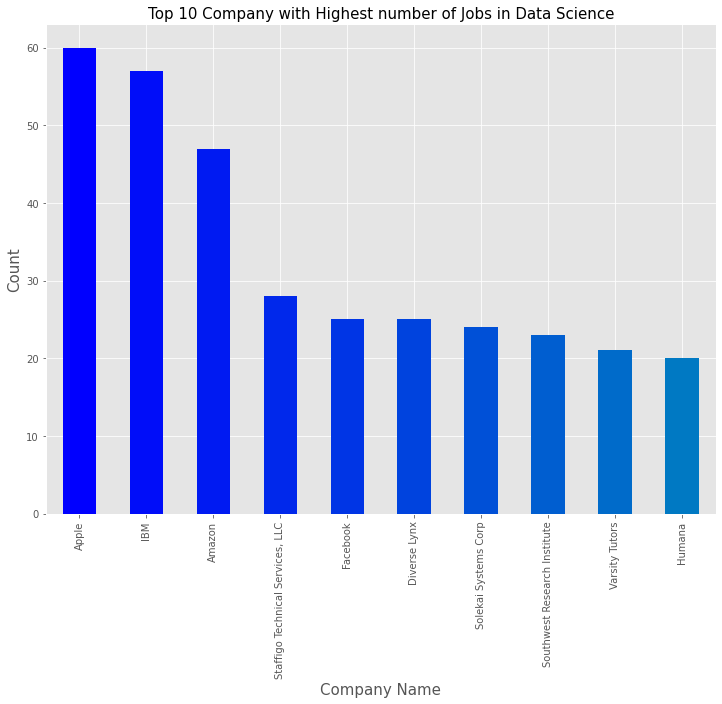

In [6]:
plt.rcParams["figure.figsize"] = (12,9)
plt.style.use("ggplot")
color = plt.cm.winter(np.linspace(0,1,20))
datascientist_data["Company Name"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Top 10 Company with Highest number of Jobs in Data Science",fontsize=15)
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

After Visualize the graph we can say Apple,IBM ans Amazon has most job for data science role

let's see which state has more data science role

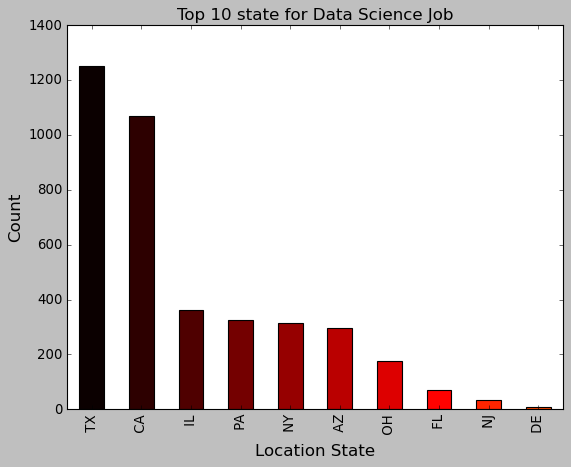

In [7]:
plt.rcParams['figure.figsize'] = (12,9)
plt.style.use("classic")
color = plt.cm.hot(np.linspace(0,1,20))
datascientist_data["Location State"].value_counts().sort_values(ascending=False).head(10).plot.bar(color=color)
plt.title("Top 10 state for Data Science Job",fontsize=15)
plt.xlabel("Location State",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In united state Texas and california has more data science job

*most popular data science job title*

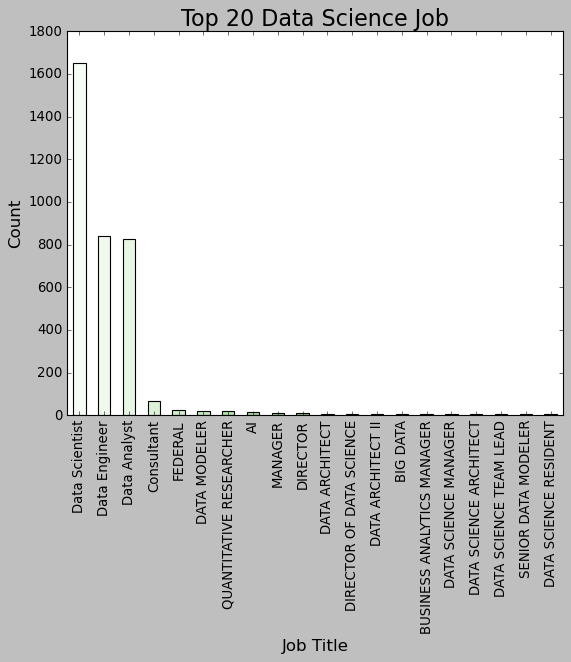

In [8]:
plt.rcParams['figure.figsize'] = (12,9)
plt.style.use('classic')
color = plt.cm.Greens(np.linspace(0,1,20))
datascientist_data["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Data Science Job",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

After Visualizing the data get to know, for Data scientist role we have more job in market and data engineer comes to second position

Top 20 Head Quarters of Data Science, Job Holder Company

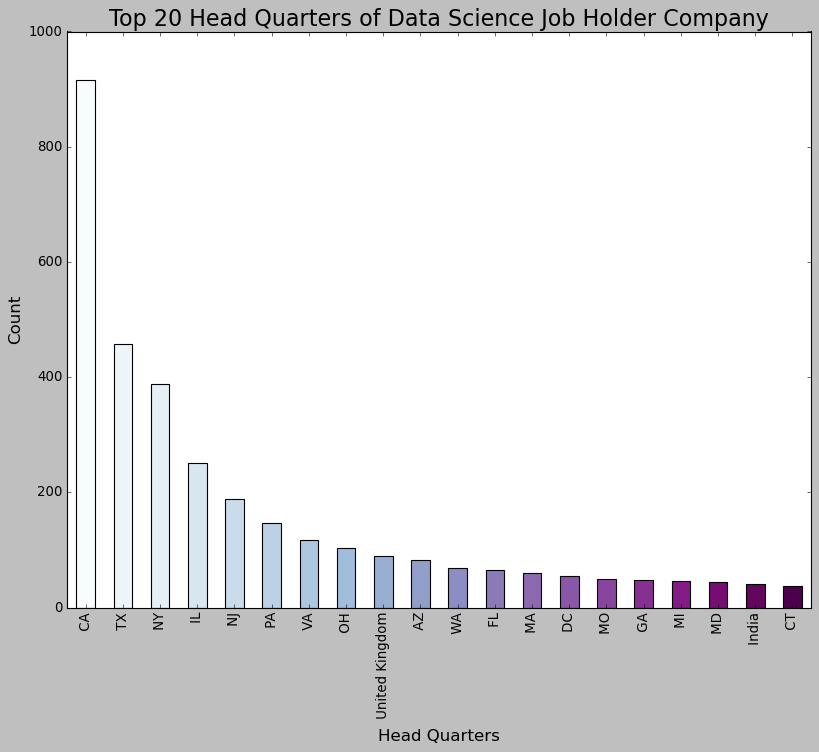

In [9]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.BuPu(np.linspace(0,1,20))
datascientist_data["Headquarters State"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Top 20 Head Quarters of Data Science Job Holder Company",fontsize=20)
plt.xlabel("Head Quarters",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Number of companies founded in year

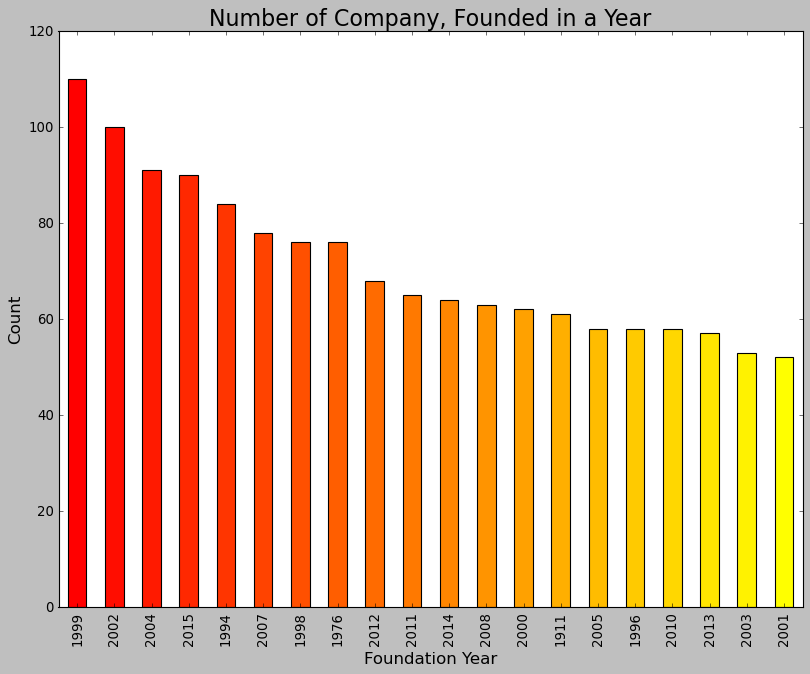

In [10]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.autumn(np.linspace(0,1,20))
datascientist_data["Founded"].value_counts().sort_values(ascending=False)[1:21].plot.bar(color=color)
plt.title("Number of Company, Founded in a Year",fontsize=20)
plt.xlabel("Foundation Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

So 1999 is the Year when almost 110 Company's with Data Science job has been Founded,then in the Year 2002 almost 100 company's with data science job has been Founded,so we can say that after 1999 ,demand of Data Science job has been Increased Rapidly

Types of ownership of company

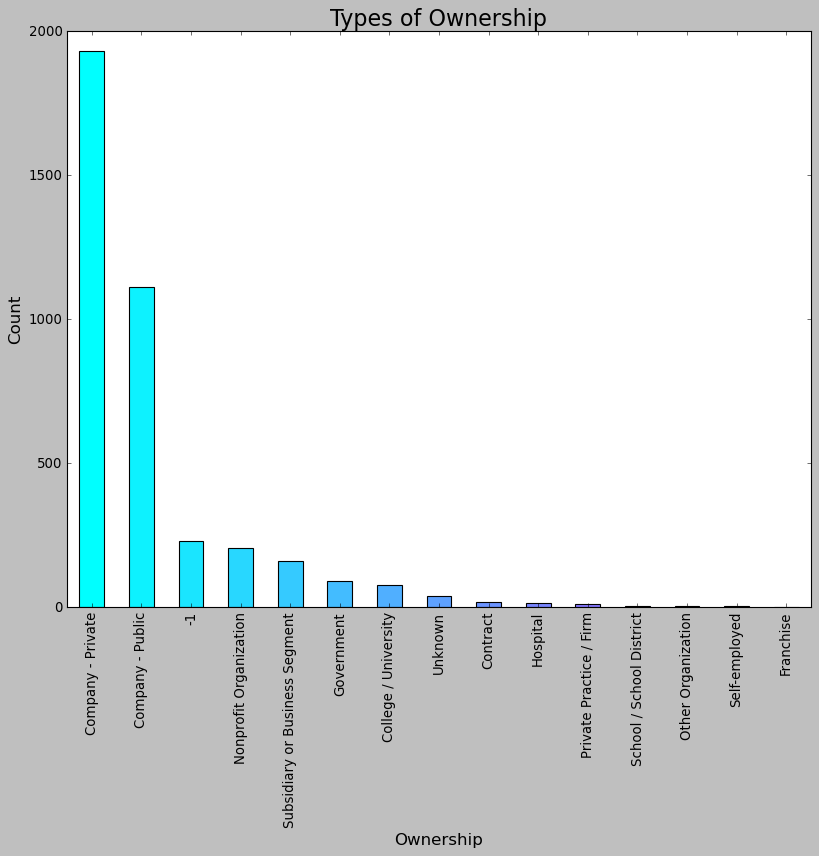

In [11]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.cool(np.linspace(0,1,20))
datascientist_data["Type of ownership"].value_counts().sort_values(ascending=False).plot.bar(color=color)
plt.title("Types of Ownership",fontsize=20)
plt.xlabel("Ownership",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Higher number of Data Science Company's are Private almost 1900 & then almost 1100 company's are Public

Different sector involve in data science job

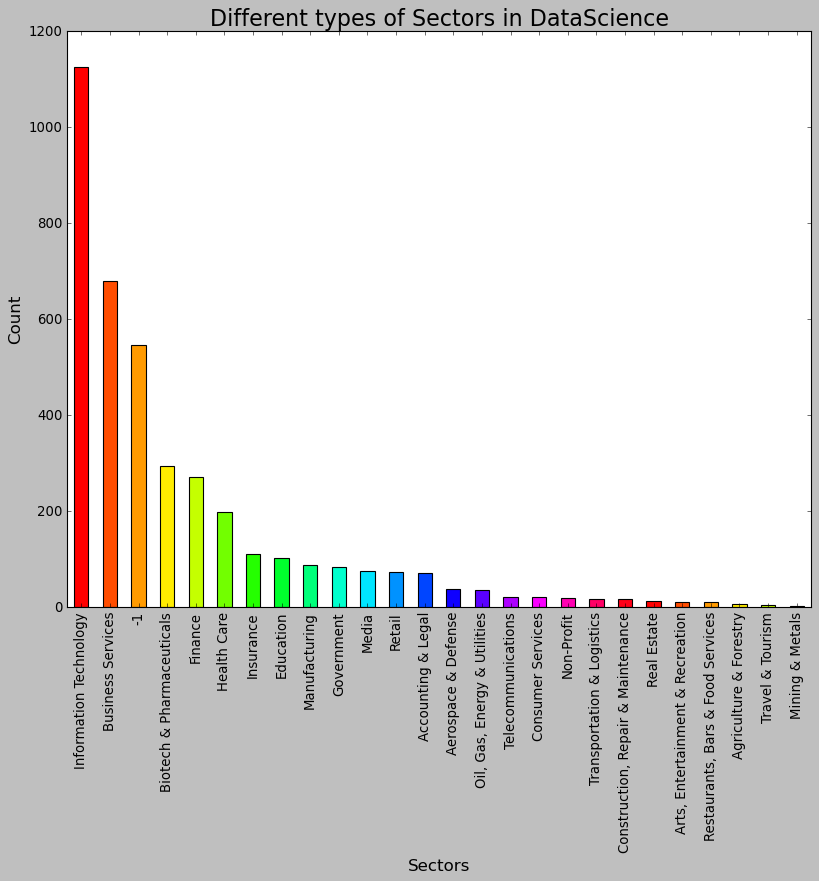

In [12]:
plt.rcParams['figure.figsize'] = (12,9)
color = plt.cm.hsv(np.linspace(0,1,20))
datascientist_data["Sector"].value_counts().sort_values(ascending=False).plot.bar(color=color)
plt.title("Different types of Sectors in DataScience",fontsize=20)
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Most of the data science job belongs to information technology sector

In [13]:
datascientist_data[['Job Title','salary_estimate_upper_bound']].nlargest(10,"salary_estimate_upper_bound")

Job Title  salary_estimate_upper_bound
164    Data Analyst                        254.0
165    Data Analyst                        254.0
166    Data Analyst                        254.0
167    Data Analyst                        254.0
168  Data Scientist                        254.0
169  Data Scientist                        254.0
170    Data Analyst                        254.0
171  Data Scientist                        254.0
172  Data Scientist                        254.0
173  Data Scientist                        254.0

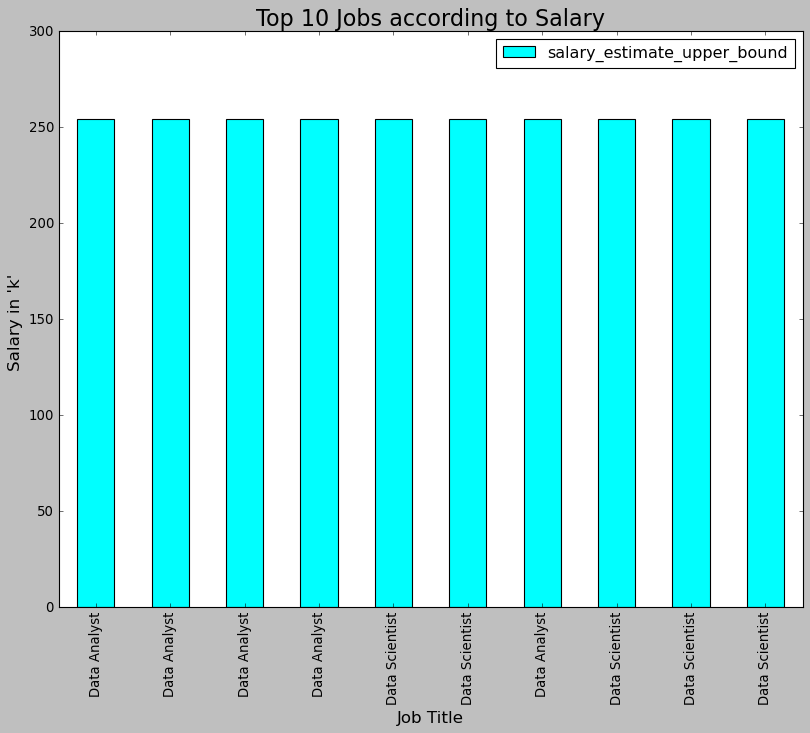

In [14]:
plt.rcParams['figure.figsize'] = (12,9)
datascientist_data[['Job Title','salary_estimate_upper_bound']].nlargest(10,"salary_estimate_upper_bound").plot.bar(x="Job Title",y="salary_estimate_upper_bound",color='cyan')
plt.title("Top 10 Jobs according to Salary",fontsize=20)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Salary in 'k' ",fontsize=15)
plt.show()

feature corelation heatmap

<AxesSubplot:>

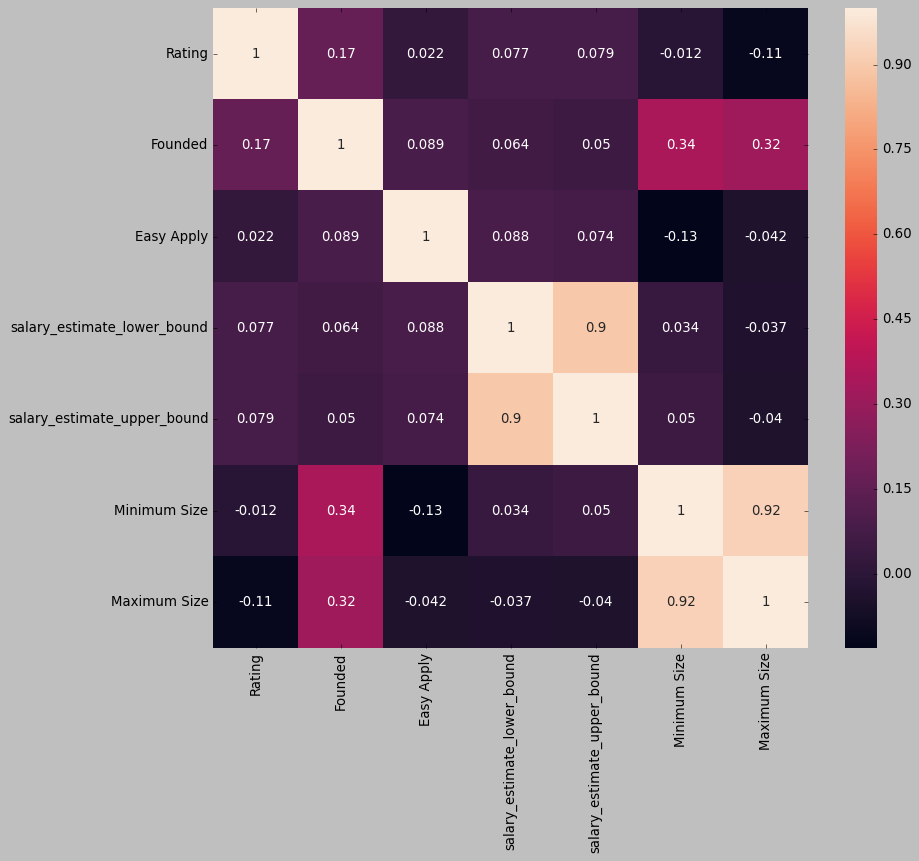

In [15]:
plt.subplots(figsize=(12,10))
sns.heatmap(datascientist_data.corr(),annot=True)

In [16]:
data = datascientist_data.groupby('Location City')[['salary_estimate_upper_bound', 'salary_estimate_lower_bound']].mean().sort_values(['salary_estimate_upper_bound','salary_estimate_lower_bound'],ascending=False).head(20)
data

salary_estimate_upper_bound  salary_estimate_lower_bound
Location City                                                             
Queens Village                     254.000000                   156.000000
Rockville Centre                   254.000000                   156.000000
Stanford                           237.000000                   150.000000
Franklin Lakes                     210.000000                   129.000000
Port Washington                    210.000000                   129.000000
Duarte                             208.000000                   132.000000
Sherman Oaks                       208.000000                   132.000000
Livermore                          202.750000                   137.500000
Redwood City                       200.687500                   138.750000
Los Gatos                          200.500000                   143.000000
Mountain View                      198.950000                   139.025000
Santa Clara                        197.861538                   135.630769
Universal City                     196.666667                   122.666667
Sunnyvale                          196.542857                   137.000000
Fremont                            194.500000                   141.000000
Menlo Park                         194.192308                   134.000000
Marina del Rey                     193.000000                   114.333333
Los Altos                          192.000000                   121.000000
San Jose                           187.980952                   129.942857
Campbell                           182.000000                   132.000000

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


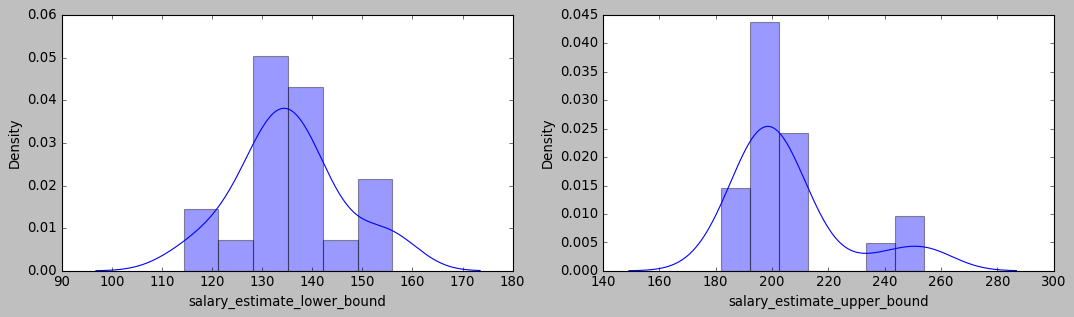

In [17]:
fig, ax = plt.subplots(1,2, figsize = [16,4])

sns.distplot(ax = ax[0], a = data['salary_estimate_lower_bound'])

sns.distplot( ax = ax[1], a = data['salary_estimate_upper_bound'])
plt.show()

In [18]:

fig = go.Figure()

fig.add_trace(go.Bar(x=data.index,y=data['salary_estimate_lower_bound'],name='Minimum salary'))
fig.add_trace(go.Bar(x=data.index,y=data['salary_estimate_upper_bound'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()

In [19]:
data1 = datascientist_data.groupby('Job Title')[['salary_estimate_upper_bound','salary_estimate_lower_bound']].mean().sort_values(['salary_estimate_upper_bound','salary_estimate_lower_bound'],ascending=False).head(20)
data1

salary_estimate_upper_bound  \
Job Title                                                                         
COMMUNITY DATA MANAGER                                                    250.0   
DATA SCIENCE RESEARCHER                                                   250.0   
STATS CAT (FOUNDING STATISTICIAN                                          237.0   
DIGITAL MARKETING ANALYTICS MANAGER                                       237.0   
SENIOR                                                                    232.0   
HEAD OF DATA                                                              225.0   
DIGITAL ANALYTICS MANAGER                                                 218.0   
EXPLORATORY DATA ANALYSIS INSTRUCTOR                                      218.0   
QA AUTOMAION DATA SCIENCE                                                 217.0   
SOFTWARE DEVELOPER                                                        217.0   
VBA SOFTWARE DEVELOPER                                                    217.0   
WORKFORCE & DATA ANALYTICS MANAGER (CALL CENTER...                        217.0   
ELECTRO-OPTICAL                                                           214.0   
SIRI                                                                      214.0   
RISK ANALYTICS MANAGER                                                    211.0   
DALLAS CAMPUS RECRUITING 2018                                             210.0   
DATA SPECIALIST                                                           210.0   
PRINCIPAL ASSOCIATE                                                       210.0   
DATA SCIENCE & MACHINE LEARNING RESEARCH INTERN                           210.0   
INVESTMENT & DATA SCIENCE INTERN                                          210.0   

                                                    salary_estimate_lower_bound  
Job Title                                                                        
COMMUNITY DATA MANAGER                                                    200.0  
DATA SCIENCE RESEARCHER                                                   200.0  
STATS CAT (FOUNDING STATISTICIAN                                          150.0  
DIGITAL MARKETING ANALYTICS MANAGER                                       143.0  
SENIOR                                                                    142.5  
HEAD OF DATA                                                              141.0  
DIGITAL ANALYTICS MANAGER                                                 134.0  
EXPLORATORY DATA ANALYSIS INSTRUCTOR                                      134.0  
QA AUTOMAION DATA SCIENCE                                                 138.0  
SOFTWARE DEVELOPER                                                        138.0  
VBA SOFTWARE DEVELOPER                                                    138.0  
WORKFORCE & DATA ANALYTICS MANAGER (CALL CENTER...                        138.0  
ELECTRO-OPTICAL                                                           135.0  
SIRI                                                                      135.0  
RISK ANALYTICS MANAGER                                                    114.0  
DALLAS CAMPUS RECRUITING 2018                                             134.0  
DATA SPECIALIST                                                           134.0  
PRINCIPAL ASSOCIATE                                                       131.5  
DATA SCIENCE & MACHINE LEARNING RESEARCH INTERN                           129.0  
INVESTMENT & DATA SCIENCE INTERN                                          129.0

In [20]:
datascientist_data['Average Salary'] = datascientist_data[['salary_estimate_upper_bound','salary_estimate_lower_bound']].mean(axis = 1)

In [21]:
import plotly.express as px
fig = px.scatter(datascientist_data, x=datascientist_data['Rating'], y= datascientist_data['Average Salary'])
fig.update_layout(title = 'Relation between average salary and rating of companies')
fig.show()

# word cloud

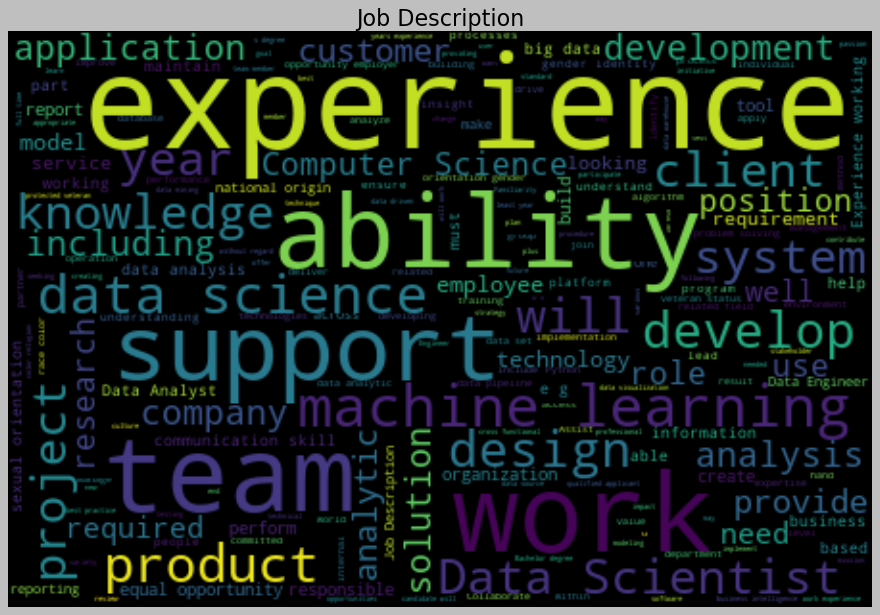

In [22]:
Job_Title = datascientist_data['Job Description'][~pd.isnull(datascientist_data['Job Description'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Job_Title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(datascientist_data['Job Description'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

# Location of state

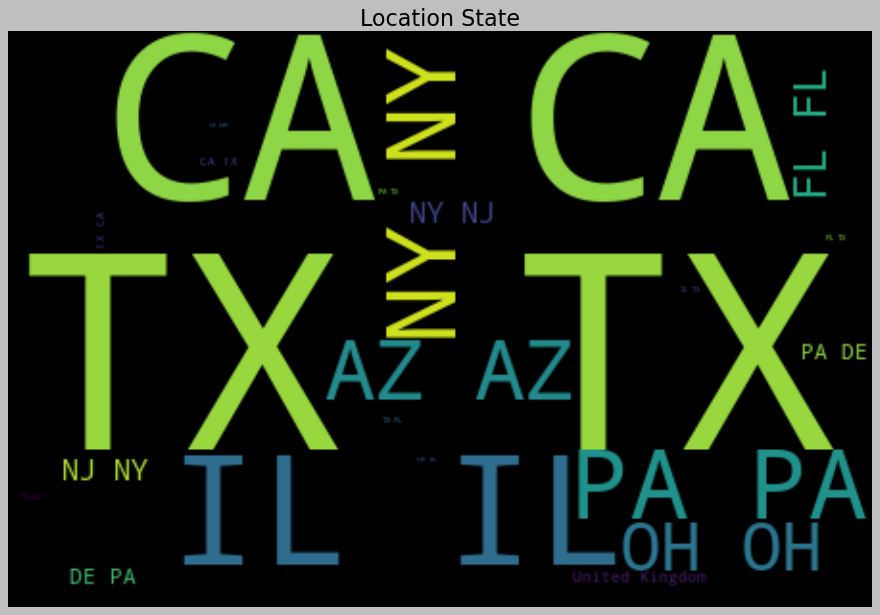

In [23]:
State_Location = datascientist_data['Location State'][~pd.isnull(datascientist_data['Location State'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(State_Location))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(datascientist_data['Location State'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()